# Homework1

Please upload to Brightspace a **.zip** archive containing your Jupyter Notebook with solutions and all data required to reproduce your solutions. 

Please also prepare a **requirements.txt** file which lists all the packages that you have used for your homework, one package per line. This will allow us to install all required packages.

Please name your .zip archive using your full name and student id as follows - **Firstname_Lastname_12345678_COMP47350_Homework1.zip**. 

For your Notebook, please split the code and explanations into cells so that it is easy to see and read the results of each step of your solution. Please remember to name your variables and methods with self-explanatory names. Please remember to write comments and where needed, justifications, for the decisions you make and code you write. 

Your code and analysis is like a story that awaits to be read. Always start with an introduction about the problem and your understanding of the problem domain and data analytics solution and describe the steps you do and your findings from each step.

The accepted file formats for the homework are:
    - .ipynb
    - .zip
    - .png
    - .pdf
    - .csv
    
Please keep the whole code in a single notebook. Usage of external tools/files is discouraged for portability reasons. Files in any other format but mentioned above can be used but will not be considered for the submission (including .doc, .rar, .7z, .pages, .xlsx, .tex etc.). 
Any image format is allowed to be used as far as the images appear embedded in your report (.ipynb or .pdf or .html).

**Deadline: Monday, 11 March, 2024, midnight.** 

## Exercises

This homework focuses on data understanding and preparation for a particular problem and dataset.
The data comes from the Centers for Disease Control and Prevention (CDC: https://covid.cdc.gov/covid-data-tracker/). CDC is a USA health protection agency and is in charge of collecting data about the COVID-19 pandemic, and in particular, tracking cases and trends of COVID-19 in the United States. CDC collects and makes public deidentified individual-case data on a daily basis, submitted using standardized case reporting forms. In this analysis, we focus on using the data collected by CDC to build a data analytics solution for death risk prediction. CDC collects demographic characteristics, exposure history, disease severity indicators and outcomes, clinical data, laboratory diagnostic test results, and comorbidities. It also includes information on whether the individual survived or not.

The dataset we work with is a sample of the public data released by CDC, where the outcome for the target feature death_yn is known (i.e., either 'yes' or 'no'):
https://data.cdc.gov/Case-Surveillance/COVID-19-Case-Surveillance-Public-Use-Data-with-Ge/n8mc-b4w4

Each student will work with a different subset of the data. The CSV file is named using the format: **covid19-cdc-[your-student-number].csv**, e.g., **covid19-cdc-12345678.csv** is the data file for a student with number 12345678. You need to work with the CSV file corresponding to your student number, available from this link: https://drive.google.com/drive/folders/1BvAsc_dT8sOpqoiIDWtYDovCUYEgxug0?usp=sharing. There are 4 parts for this homework. Each part has an indicative maximum percentage given in brackets, e.g., part (1) has a maximum of 40% shown as [40]. The total marks are then converted to a grade, e.g., 40% maps to a pass grade D-, 75% maps to a B.


(1). [40] Prepare a data quality report for your CSV file. Below you have a set of guideline steps to help you in this process. All the steps need to be implemented with Python code.

    - Check how many rows and columns your dataset has.
    - Print the first and the last 5 rows.
    - Convert the features to their appropriate data types (e.g., decide which features are more appropriate as 
    continuous and which ones as categorical types). 
    - Look for duplicate rows and columns. Consider whether it makes sense to keep them or drop them.
    - Look for constant columns. Consider whether it makes sense to keep them or drop them.
    - Save your updated/cleaned data frame to a new csv file.
  
    For the updated CSV and data frame (after column/row removal):
    - Prepare a table with descriptive statistics for all the continuous features.
    - Prepare a table with descriptive statistics for all the categorical features.
    - Plot histograms for all the continuous features.
    - Plot box plots for all the continuous features.
    - Plot bar plots for all the categorical features.
    - Discuss your initial findings from the tables and plots.
    - Prepare the initial discussion of your findings into a single data quality report PDF file. 
    The PDF report should focus on the key issues identified in the data and discuss potential strategies to handle them. Simple listing of tables and plots without discussion of findings will not receive full marks. To receive full marks you need to show your understanding and analysis of the dataset, through a detailed discussion for each feature. The report should be concise and complete, the goal is not to make it long for the sake of length, but to cover all the important aspects of the features. The notebook provides detailed steps with code, while the report is a summary of findings.

(2). [30] Prepare a data quality plan for the cleaned CSV file. 

    - Mark down all the features where there are potential problems or data quality issues.
    - Propose solutions to deal with the problems identified. Explain why did you choose one solution over 
    potentially many other. It is very important to provide justification for your thinking in this part and to list potential solutions, including the solution that will be implemented to clean the data.
    - Apply your solutions to obtain a new CSV file where the identified data quality issues were addressed. 
    - Save the new CSV file with a self explanatory name. 
    - Save the data quality plan to a single PDF file.
        
(3). [15] Exploring relationships between feature pairs:

    - Choose a subset of features you find promising and plot pairwise feature interactions (e.g., 
    continuous-continuous feature plot or continuous-categorical plots or correlation plots). 
    Explain your choices.
    - Discuss your findings from the plots above. Do you find any features or feature combinations that are 
    indicative of the target outcome? Explain in plain words (a short paragraph) the story of your
    findings so far.
    
(4). [15] Create new features: Transform, extend or combine the existing features, or add new features from external sources, to create a few new features (at least 3) with the aim to better capture the problem domain and the target outcome. Justify the steps and choices you are making. In the grading, consideration will be given to the creativity and domain knowledge shown in preparing the new features. Use code to show that your new features are indeed useful for the target prediction problem. Add these features to your clean dataset and save it as a CSV file with a self explanatory name. 

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [52]:
df = pd.read_csv('covid19-cdc-23201629.csv', keep_default_na=True, delimiter=',', skipinitialspace=True)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   case_month                       50000 non-null  object 
 1   res_state                        49999 non-null  object 
 2   state_fips_code                  49999 non-null  float64
 3   res_county                       47092 non-null  object 
 4   county_fips_code                 47092 non-null  float64
 5   age_group                        49618 non-null  object 
 6   sex                              48858 non-null  object 
 7   race                             43776 non-null  object 
 8   ethnicity                        43211 non-null  object 
 9   case_positive_specimen_interval  26393 non-null  float64
 10  case_onset_interval              21284 non-null  float64
 11  process                          50000 non-null  object 
 12  exposure_yn       

In [54]:
df.shape

(50000, 19)

In [55]:
df.head(5)

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,2021-12,CA,6.0,ORANGE,6059.0,65+ years,Female,White,Non-Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Unknown,No,Missing,Yes,NaN
1,2020-04,IL,17.0,COOK,17031.0,65+ years,Female,Asian,Non-Hispanic/Latino,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Missing,Yes,Missing,Yes,NaN
2,2021-11,AZ,4.0,MARICOPA,4013.0,65+ years,Female,White,Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Yes,Missing,Yes,NaN
3,2022-02,MI,26.0,WAYNE,26163.0,65+ years,Male,White,Non-Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Yes,NaN
4,2020-11,AZ,4.0,MARICOPA,4013.0,65+ years,Female,White,Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Yes,Missing,Yes,NaN


In [56]:
df.tail(5)

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
49995,2022-05,NY,36.0,NIAGARA,36063.0,18 to 49 years,Male,Missing,Unknown,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN
49996,2021-08,SC,45.0,PICKENS,45077.0,0 - 17 years,Male,White,Non-Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Unknown,Missing,No,NaN
49997,2020-12,NJ,34.0,MORRIS,34027.0,18 to 49 years,Male,White,Missing,0.0,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN
49998,2021-12,IN,18.0,OWEN,18119.0,18 to 49 years,Male,White,Non-Hispanic/Latino,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,No,Missing,No,NaN
49999,2021-11,IN,18.0,LAKE,18089.0,50 to 64 years,Female,White,Non-Hispanic/Latino,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,No,Missing,No,NaN


In [57]:
df.dtypes

case_month                          object
res_state                           object
state_fips_code                    float64
res_county                          object
county_fips_code                   float64
age_group                           object
sex                                 object
race                                object
ethnicity                           object
case_positive_specimen_interval    float64
case_onset_interval                float64
process                             object
exposure_yn                         object
current_status                      object
symptom_status                      object
hosp_yn                             object
icu_yn                              object
death_yn                            object
underlying_conditions_yn            object
dtype: object

In [58]:
for object in df.select_dtypes(['object']).columns:
    df[object] = df[object].astype('category')

In [59]:
duplicate_rows = df.duplicated()
dr = 0
for r in duplicate_rows:
    if r:
        dr += 1
print(dr)

4641


I'm dropping the 2 fips code columns because they are redundant data to the res_state, and res_county columns. These features don't mean that dulicate rows are not valueable data, so I am keeping them.

In [60]:
df = df.drop(['state_fips_code', 'county_fips_code'], axis=1)

None of my columns are constant so I will keep them all.

In [61]:
df.to_csv("covid_data_clean.csv", index=False)

In [62]:
dfc = pd.read_csv('covid_data_clean.csv', keep_default_na=True, delimiter=',', skipinitialspace=True)

In [63]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   case_month                       50000 non-null  object 
 1   res_state                        49999 non-null  object 
 2   res_county                       47092 non-null  object 
 3   age_group                        49618 non-null  object 
 4   sex                              48858 non-null  object 
 5   race                             43776 non-null  object 
 6   ethnicity                        43211 non-null  object 
 7   case_positive_specimen_interval  26393 non-null  float64
 8   case_onset_interval              21284 non-null  float64
 9   process                          50000 non-null  object 
 10  exposure_yn                      50000 non-null  object 
 11  current_status                   50000 non-null  object 
 12  symptom_status    

In [64]:
continuous_columns = df.select_dtypes(['float64']).columns
df[continuous_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
case_positive_specimen_interval,26393.0,0.206835,2.907302,-89.0,0.0,0.0,0.0,194.0
case_onset_interval,21284.0,-0.050319,2.006323,-105.0,0.0,0.0,0.0,72.0


In [65]:
category_columns = df.select_dtypes(['category']).columns
df[category_columns].describe().T

,count,unique,top,freq
case_month,50000,40,2022-01,6313
res_state,49999,50,NY,5653
res_county,47092,953,MIAMI-DADE,1006
age_group,49618,5,18 to 49 years,20040
sex,48858,4,Female,25440
race,43776,8,White,30382
ethnicity,43211,4,Non-Hispanic/Latino,29658
process,50000,9,Missing,45361
exposure_yn,50000,3,Missing,43020
current_status,50000,2,Laboratory-confirmed case,42181


In [162]:
#for testing info

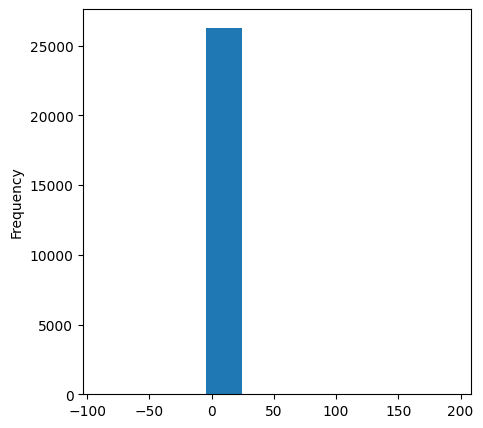

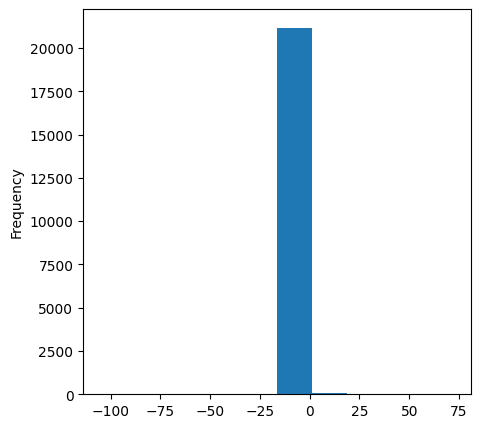

In [92]:
for col in continuous_columns:
    df[col].plot(kind='hist', figsize=(5,5))
    plt.show()

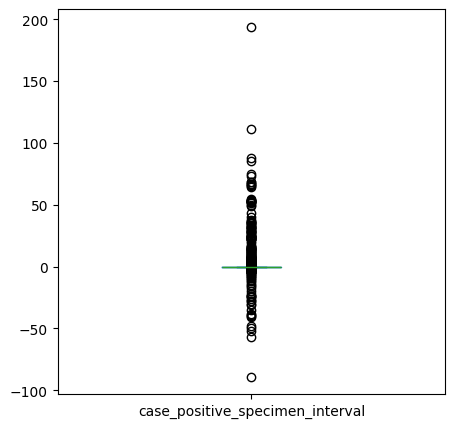

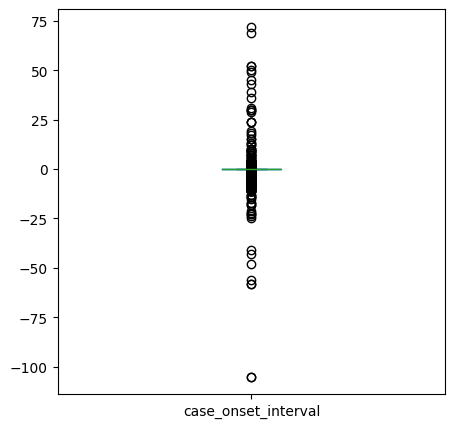

In [93]:
for col in continuous_columns:
    df[col].plot(kind='box', figsize=(5,5))
    plt.show()

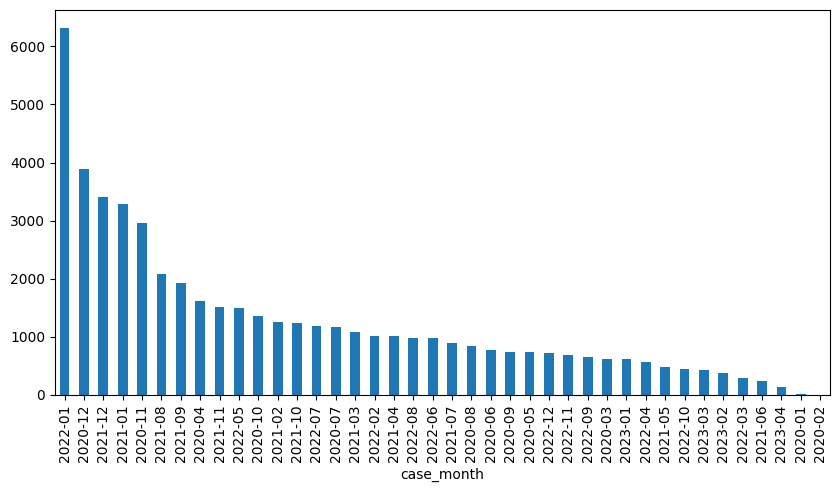

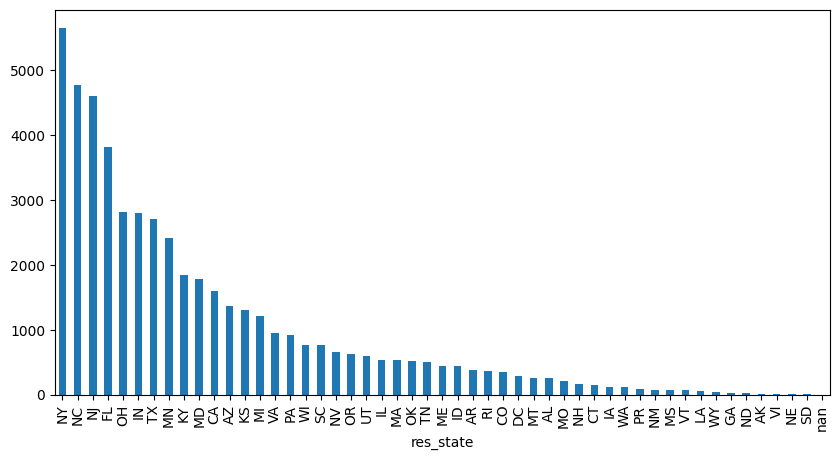

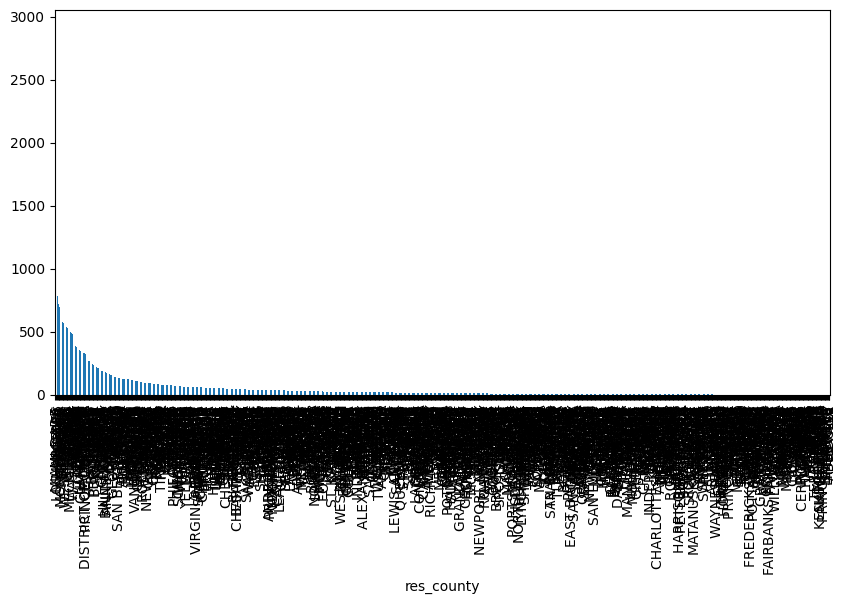

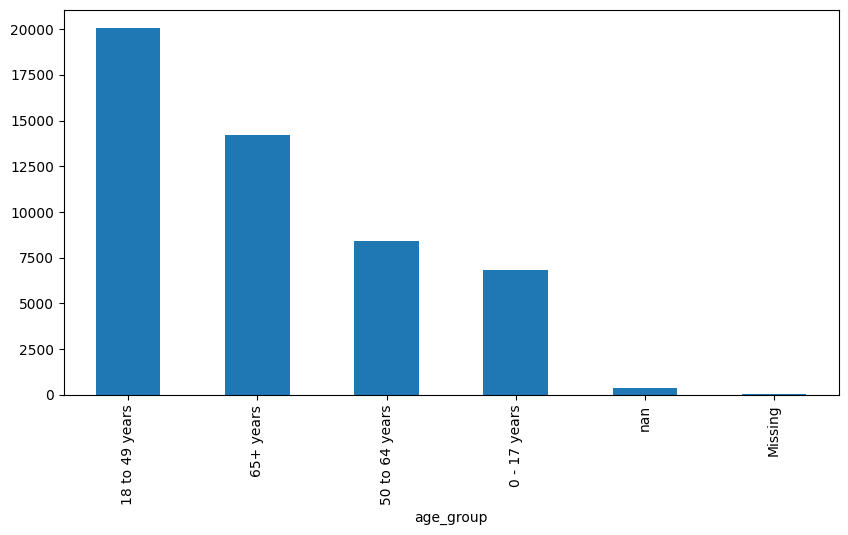

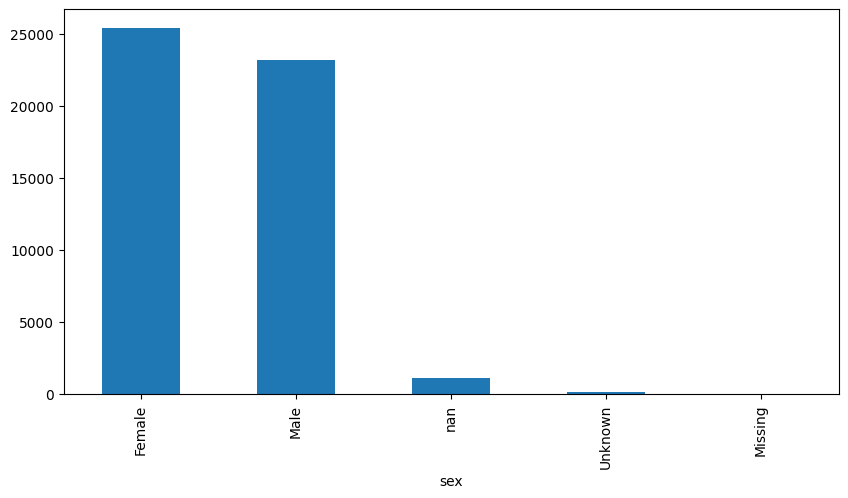

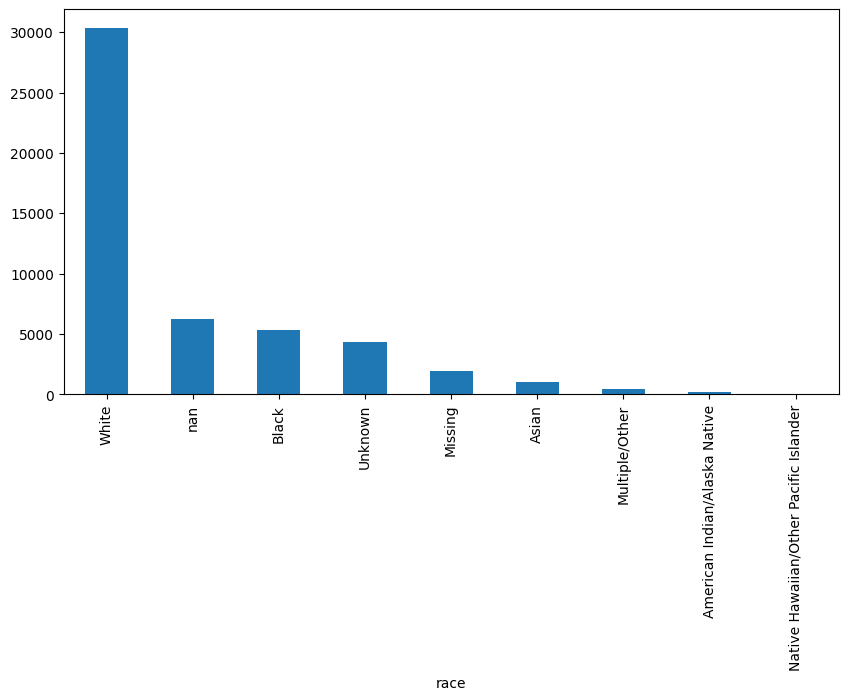

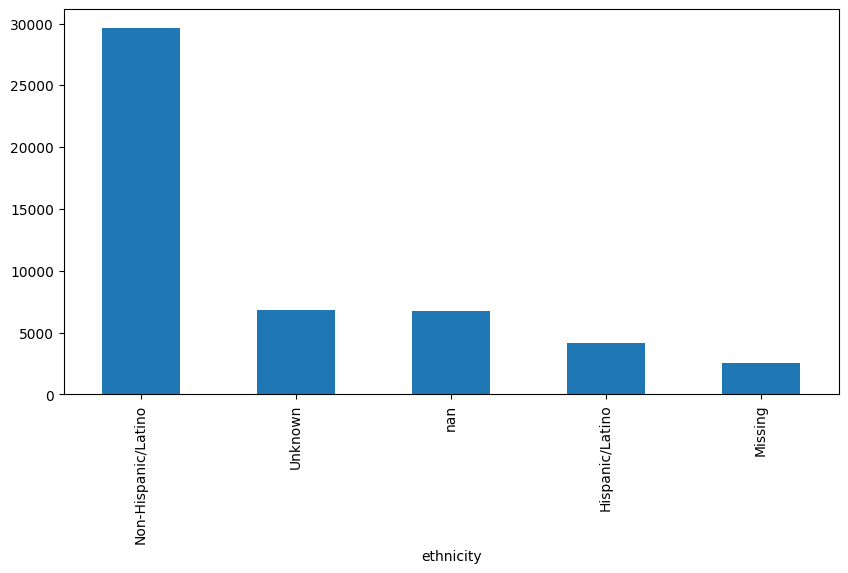

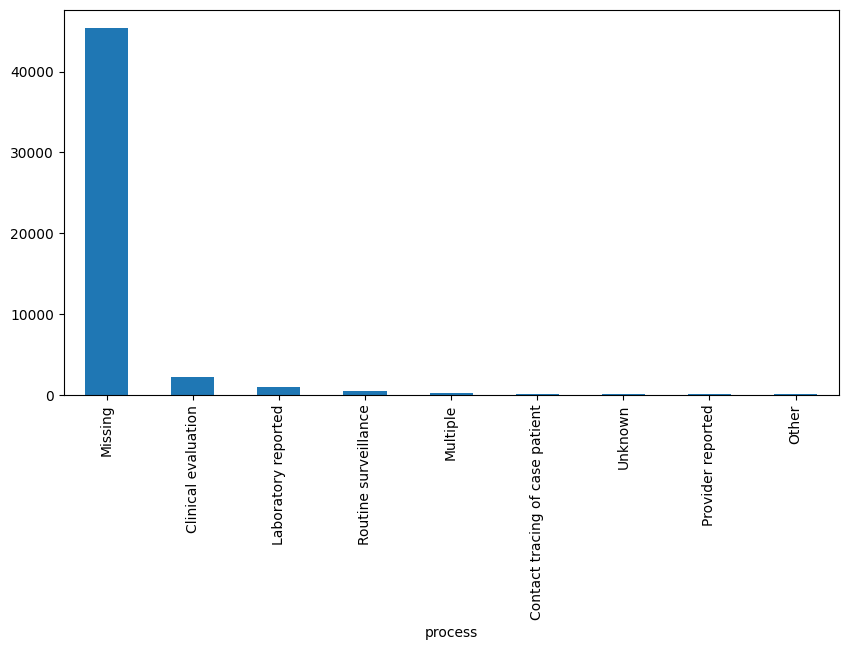

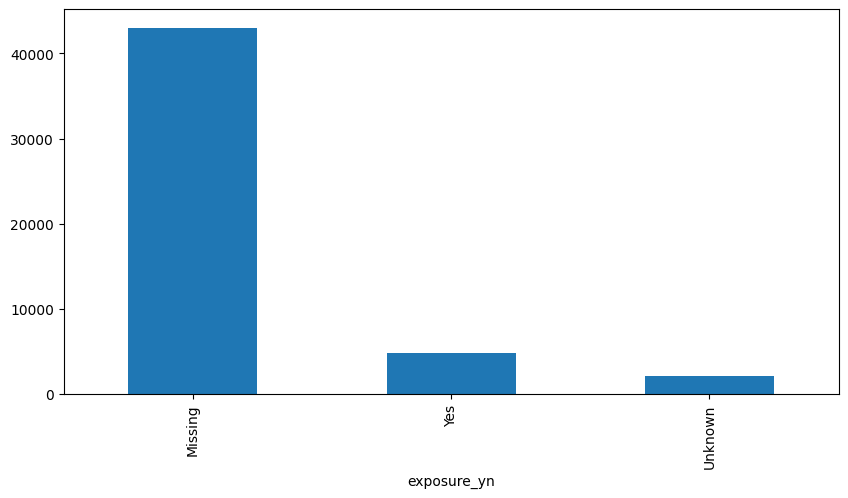

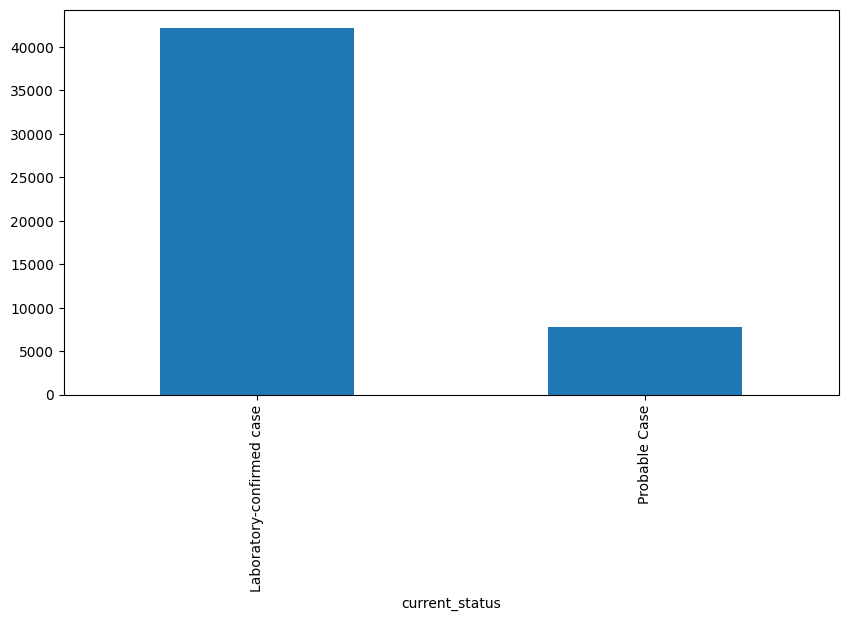

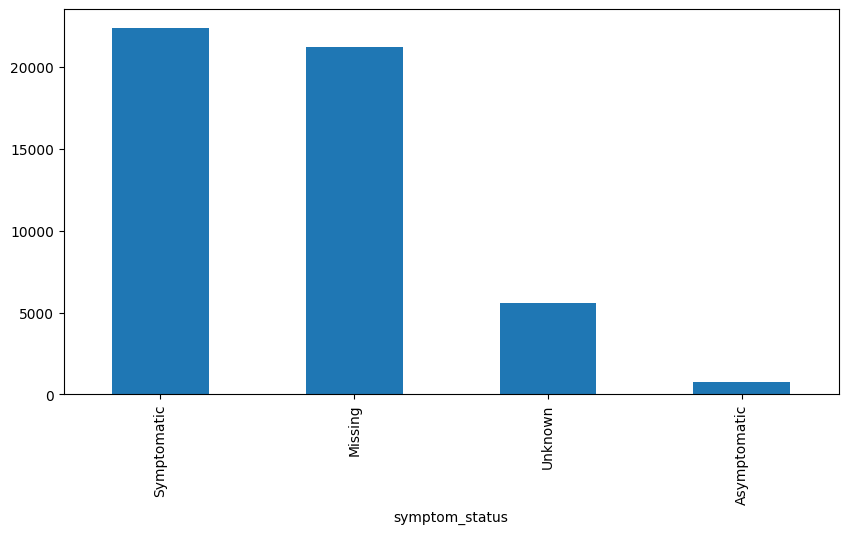

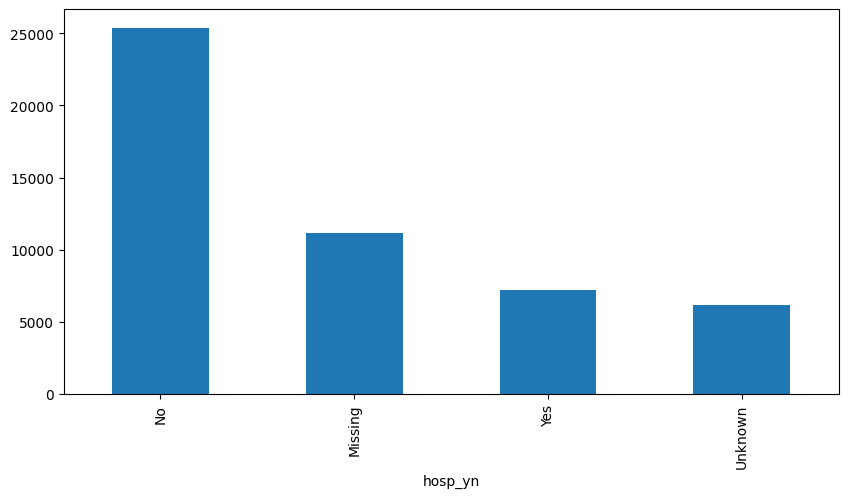

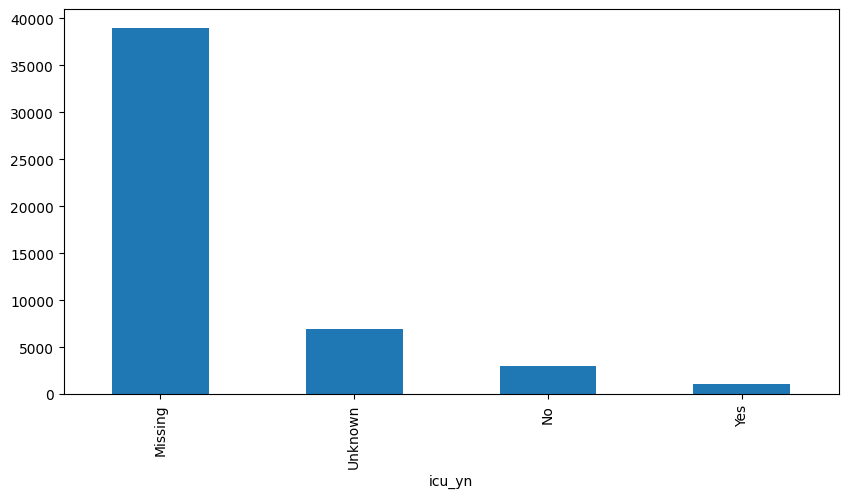

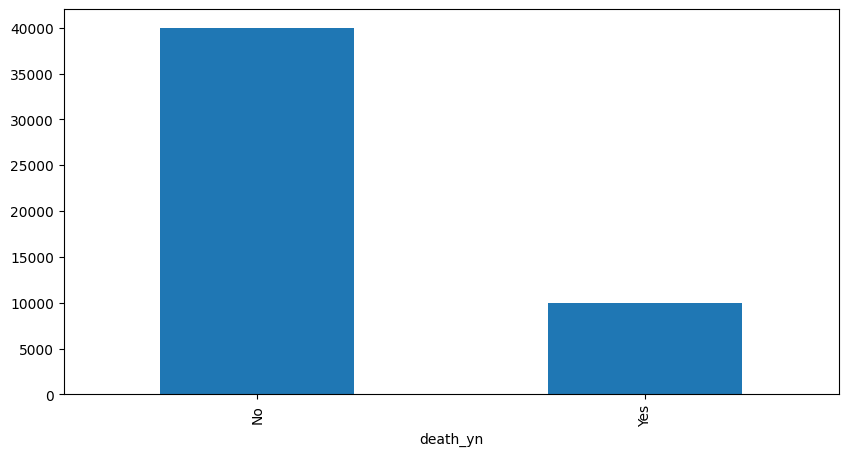

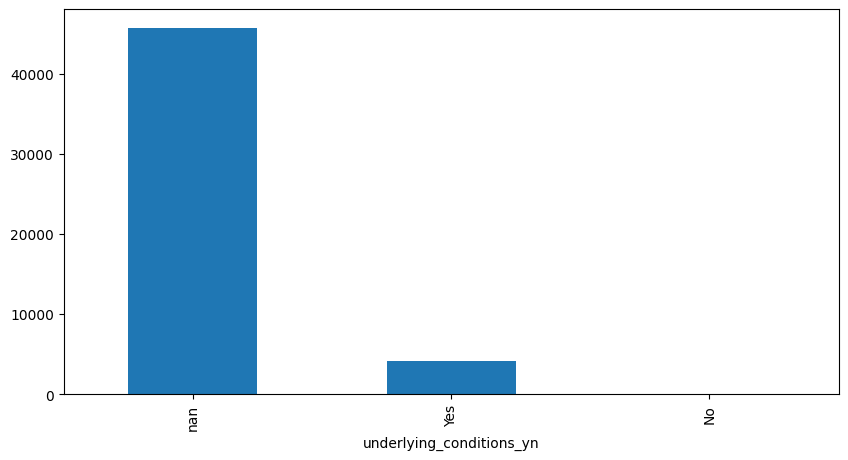

In [91]:
for col in category_columns:
    df[col].value_counts(dropna = False).plot(kind='bar', figsize=(10,5))
    plt.show()